# Develop A Neural Network That Can Read Handwriting
# Dataset Used : MNIST Dataset
# About Dataset


The MNIST dataset is widely utilized in machine learning and computer vision research. It comprises 70,000 images of handwritten digits (0-9) with each image measuring 28x28 pixels. The dataset is divided into two subsets: a training set containing 60,000 images and a test set with 10,000 images. The training set is employed to train a machine learning model, while the test set is used to assess the model's performance.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique , argmax

# TensorFlow already contain MNIST data set which can be loaded using Keras
import tensorflow as tf # installing tenserflow
from tensorflow import keras

In [2]:
# To Load the MNIST dataset from the Keras API provided by TensorFlow.
mnist = tf.keras.datasets.mnist

The provided code indicates that the dataset consists of the following:

1. A collection of 60,000 images represented as 28x28 NumPy arrays. Each array represents an individual image, and the pixel values within the arrays range from 0 to 255.
2. An array of 60,000 labels corresponding to the correct digits (0-9) for the 60,000 images.
3. A collection of 10,000 images represented as 28x28 NumPy arrays. Similarly, each array represents an individual image, and the pixel values within the arrays range from 0 to 255.
4. An array of 10,000 labels corresponding to the correct digits (0-9) for the 10,000 images.

#Dividing the data into train and test data.

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [6]:
print(x_test)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [7]:
#To prepare the input data for a Convolutional Neural Network (CNN) in TensorFlow, it needs to be reshaped into a 4D format.
#The required shape is (num_samples, image_height, image_width, num_channels), where num_samples represents the number of images, image_height and image_width are the dimensions of each image, and num_channels indicates the number of color channels.
#In this case, since the input images are grayscale, num_channels is set to 1.
#By reshaping the data in this manner, it conforms to the expected input format for a CNN in TensorFlow.

x_train = x_train.reshape((x_train.shape[0] , x_train.shape[1] , x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0] , x_test.shape[1] , x_test.shape[2],1))
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)
print(x_test.dtype)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
uint8
uint8


In [8]:
# Normalizing Pixel Values

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
print(x_train.dtype)
print(x_test.dtype)

float32
float32


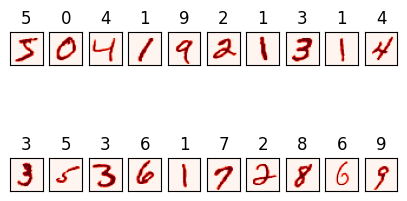

In [9]:
# Visulaizing Subsets of images in MNIST Dataset along with coressponding labels.

fig=plt.figure(figsize=(5,3))
for i in range(20):
    ax =fig.add_subplot(2,10,i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='Reds')
    ax.set_title(y_train[i])

In [10]:
# showing shape of single image
img_shape= x_train.shape[1:]
img_shape

(28, 28, 1)

#BUILDING NEURAL NETWORK THAT CAN READ HANDWRITING

In [11]:
# Creating aSequential Model in Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


This summary shows that the model has four layers:

1. A Flatten layer that flattens the input images to a 1D array of length 784.
2. A Dense layer with 128 units and ReLU activation.
3. A Dropout layer that randomly sets 20% of the input units to 0 during training.
4. A second Dense layer with 10 units and no activation function.

The summary also shows the number of trainable parameters in each layer, as well as the total number of trainable parameters in the model. In this case, the model has a total of 101,770 trainable parameters.

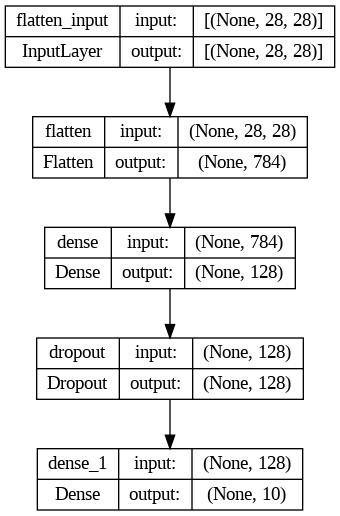

In [13]:
# Displaying Neural Network Model
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.jpg', show_shapes = True)

In [14]:
# Making Prediction on Model
prediction = model(x_train[:1]).numpy()
prediction

array([[ 0.01730527, -0.4615551 ,  0.2052885 , -0.0530715 ,  0.03582594,
        -0.3273242 ,  0.21048726, -0.210284  , -1.0317514 , -0.8279645 ]],
      dtype=float32)

In [15]:
# Applying Softmax() Function to prediction array
# This convert an output vector of real numbers into a probability distribution over predicted classes
tf.nn.softmax(prediction).numpy()

array([[0.12084906, 0.07486466, 0.14584224, 0.11263648, 0.12310812,
        0.08561947, 0.14660242, 0.09625039, 0.04232956, 0.0518976 ]],
      dtype=float32)

In [16]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], prediction).numpy()
model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy'])

#Model fitting

In [17]:
# Training the Model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2939 - accuracy: 0.9148
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1417 - accuracy: 0.9579
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1072 - accuracy: 0.9678
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0913 - accuracy: 0.9714
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0761 - accuracy: 0.9757


In [18]:
# Evaluating the Model
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0802 - accuracy: 0.9773 - 611ms/epoch - 2ms/step


[0.08020706474781036, 0.9772999882698059]

In [19]:
# Creating a new sequential model which includes both previously trained model and softmax layer.
probability_model = tf.keras.Sequential([ model,tf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.44050940e-08, 5.16324483e-10, 5.79216385e-06, 2.09913778e-04,
        5.79552769e-12, 1.01277564e-07, 2.92181847e-14, 9.99783695e-01,
        8.54876774e-08, 4.06198893e-07],
       [6.63719320e-08, 1.60573015e-03, 9.98371184e-01, 2.25039712e-05,
        6.33885026e-15, 1.97930149e-07, 4.14375627e-08, 1.41314239e-12,
        2.27806851e-07, 6.17008614e-14],
       [6.94852986e-07, 9.97087777e-01, 4.61312331e-04, 5.85968428e-06,
        1.35089995e-05, 2.48297729e-05, 9.76161027e-06, 2.27411231e-03,
        1.21382996e-04, 6.54992618e-07],
       [9.99850988e-01, 2.12014184e-09, 2.72673860e-05, 6.67513802e-07,
        2.32423162e-07, 1.61407684e-06, 1.64203539e-05, 4.45666001e-06,
        1.98180800e-07, 9.80380210e-05],
       [3.66152631e-06, 3.59641525e-08, 1.84509572e-05, 3.81980300e-07,
        9.91816938e-01, 2.58812179e-06, 7.27638962e-07, 1.01961821e-04,
        2.74719497e-07, 8.05499032e-03]], dtype=float32)>

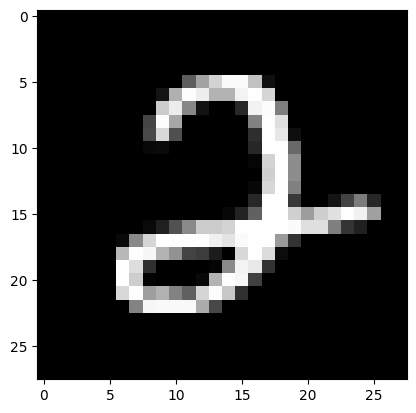

In [22]:
# Displaying a Grayscale Image
img = x_train[16]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [23]:
# Predicting the Result
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 35ms/step
predicted : 2
